## Exploratory Data Analysis  

This project is based on the dataset “Pokemon with Stats” by Parradas (2016)

The data set includes 800 Pokemon, including their number, name, first and second type, basic stats: HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation and if it is Legendary or not. 

As part of the preparation for this project, I learned to load the pokemon.csv dataset into my Jupyter notebook and use it to practice the topics discussed in the lecture: 

- Load and explore the *.csv datasets
- Look up further details of the Pandas import functions in:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- Explore the loaded DataFrame using Pandas
(https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)
- Use the slice notation to select rows and columns
- Calculate basic statistics on the dataset (e.g. variance, standard deviation, percentiles, etc)
- Explore further calculations in Numpy
- Data Visualisation using Matplotlib

In [1]:
# Required libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###  pokemon.csv dataset

Let's start by loading the data from csv and explore:


In [2]:
#Here I used pandas to read in the dataset pokemon.csv as a pandas DataFrame named df_pokemon
df_pokemon = pd.read_csv("pokemon.csv")

In [3]:
# Explore columns
df_pokemon.columns

Index(['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'SpAtk', 'SpDef', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
#print command to display the number of rows and columns
print('Number of columns in Dataframe Pokemon: ', len(df_pokemon.columns))
print('Number of rows in Dataframe Pokemon: ', len(df_pokemon.index))

#dataset content by printing the first six rows to the console
df_pokemon.head(6)

Number of columns in Dataframe Pokemon:  13
Number of rows in Dataframe Pokemon:  800


,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,NotLegendary
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,NotLegendary


In [5]:
#dataset content by printing the last six rows to the console
df_pokemon.tail(6)

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,Legendary
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,Legendary
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,Legendary
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,Legendary


### Prepare the dataset for analysis

Use pandas to test if there are any null values in df_pokemon and create a new version df_pokemon_co of df_pokemon which excludes all observations affected by missing data. Use the print command to display the number of complete observations to the console.

In [6]:
#test if there are any null values and print the result to the console as a boolean.
print(df_pokemon.isnull().values.any()) 

#Create a new version df_pokemon_co of df_pokemon which excludes all observations affected by missing data.
df_pokemon_co=df_pokemon.dropna(axis=0) 

# Use the print to display the number of complete observations
print('The new number of columns in the Dataframe Pokemon : ', len(df_pokemon_co.columns))
print('The new number of rows in the Dataframe Pokemon : ', len(df_pokemon_co.index))

True
The new number of columns in the Dataframe Pokemon :  13
The new number of rows in the Dataframe Pokemon :  414


After the removal of observations affected by missing data the dataframe Pokemon has only 414 rows and the same number of columns 13.

### Descriptive statistics


* Use the df_pokemon_co, calculate the mean HP and total for legendary and not-legendary pokemon. Store these two means into separate variables.

* Use the print command to display the difference in mean HP and total between legendary and not-legendary pokemon to the console. The difference should be rounded to two digits.

In [8]:
#Calculate the mean HP for legendary and not-legendary pokemon. Store these two means into separate variables.
mean_HP_legendary = np.mean(df_pokemon_co[df_pokemon_co["Legendary"]=="Legendary"]["HP"])
mean_HP_notlegendary = np.mean(df_pokemon_co[df_pokemon_co["Legendary"]=="NotLegendary"]["HP"])

#Use the print command to display the difference in mean HP between legendary and not-legendary pokemon
print("The difference in mean HP between Legendary and NotLegendary:", round((mean_HP_legendary - mean_HP_notlegendary),2))

The difference in mean HP between Legendary and NotLegendary: 28.53


In [9]:
#Calculate the mean Total for legendary and not-legendary pokemon. Store and print these two means into separate variables.
mean_Total_legendary = np.mean(df_pokemon_co[df_pokemon_co["Legendary"]=="Legendary"]["Total"])
print("The Mean Total for legendary Pokemon is:", (mean_Total_legendary))

mean_Total_notlegendary = np.mean(df_pokemon_co[df_pokemon_co["Legendary"]=="NotLegendary"]["Total"])
print("The Mean Total for not legendary pokemon is:", round((mean_Total_notlegendary),2))

#Use the print command to display the difference in mean Total between legendary and not-legendary pokemon
print("The difference in mean Total between Legendary and NotLegendary:", round((mean_Total_legendary - mean_Total_notlegendary),2))

The Mean Total for legendary Pokemon is: 645.25
The Mean Total for not legendary pokemon is: 436.45
The difference in mean Total between Legendary and NotLegendary: 208.8


In [19]:
# Calculate the variance and the sd of the variable Attack for pokemon of Generation 1.
Sd_attack_G1 = np.std(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])
Var_attack_G1 = np.var(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])


print('Sd:', round(( Sd_attack_G1), 2))
print('Variance:', round((Var_attack_G1), 2))

Sd: 32.01
Variance: 1024.83


Calculate the median speed of all pokemons in the dataset

In [32]:
np.median(df_pokemon_co["Speed"])

70.0

Calculate the median Attack of all pokemons from Generation 1 and Generation 6

In [ ]:
median_Attack_gen1 = np.median(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])
print("The mediam Attack from Generation 1:", round(median_Attack_gen1))

median_Attack_gen6 = np.median(df_pokemon_co[df_pokemon_co["Generation"]==6]["Attack"])
print("The median Attack from Generation 6:", round(median_Attack_gen6))

Compare the median Attacks and display the result

In [37]:
if median_Attack_gen1 > median_Attack_gen6:
    comparison = "larger than"
elif median_Attack_gen1 < median_Attack_gen6:
    comparison = "smaller than"
else:
    comparison = "equal to"
"The median Attack of Generation 1 pokemons ({}) is {} the median Attack of Generation 6 pokemons ({})".format(
    median_Attack_gen1, comparison, median_Attack_gen6)

'The median Attack of Generation 1 pokemons (80.0) is larger than the median Attack of Generation 6 pokemons (78.5)'

Calculate the SpAtk quantile from all pokemons using the Numpy function:

In [ ]:
# Calculate quantile using the Numpy and save the results to separated variables
SpAtk_q_25 = np.quantile(df_pokemon_co["SpAtk"], q=0.25)
SpAtk_q_50 = np.quantile(df_pokemon_co["SpAtk"], q=0.50)
SpAtk_q_75 = np.quantile(df_pokemon_co["SpAtk"], q=0.75)

# Display a statement with the mean and the interquartile range
"The median SpAtk of a pokemon (N = {}) is {}. The middle 50% of pokemons fall between {} and {}.".format(
    len(df_pokemon_co), SpAtk_q_50, SpAtk_q_25, SpAtk_q_75)

Calculate the standard error (of the mean) for the variable `Attack` for pokemon of `Generation` 1, based on `df_pokemon_co`, and print it to the console. Describe the difference between a standard error (of the mean) and a standard deviation.


In [44]:
# formulation of the standard error as a lambda function
stderror = lambda x: np.sqrt(np.var(x)/x.shape[0])


stderror(df_pokemon_co[df_pokemon_co["Generation"]==1]["Attack"])

3.6247541336448013

The standard error (of the mean) is a measure of how spread out values are around the sample mean compared to the population mean. While the standard deviation is a measure of how spread out variables in the sample differ from the sample mean.


### Visualisation 

Use matplotlib to create a boxplot that shows the Total attribute for pokemons by their Type1 categorisation. You should use df_pokemon_co for this, and furthermore only consider pokemon whose Type1 is either Grass, Fire, Normal, Water, or Flying. The Total attribute should be shown on the x axis. Please use an appropriate title and axis labels.

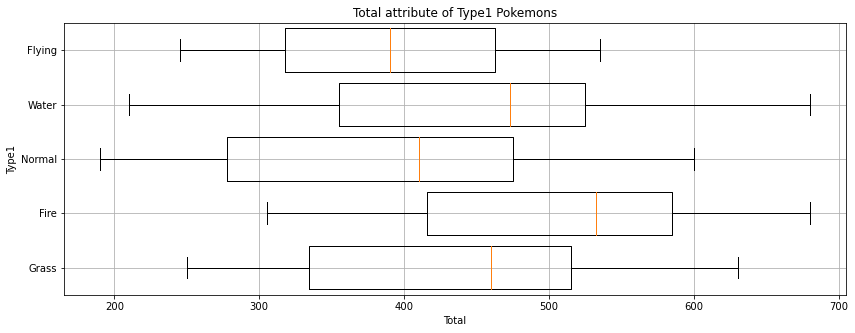

In [45]:
plotlabels = ['Grass','Fire','Normal','Water','Flying']
plotdata = [df_pokemon_co[df_pokemon_co['Type1']==label]['Total'] for label in plotlabels]
plt.figure(figsize=(14, 5)) # Specify graphic size
plt.boxplot(plotdata, labels=plotlabels, vert=False, widths=0.8, zorder=3) # Box plot
plt.xlabel('Total') # Set Total as the label for the x axis
plt.ylabel('Type1') # Set Type1 as the label for the y axis
plt.title('Total attribute of Type1 Pokemons') # Set title
plt.grid(zorder=0) # Add grid
plt.show()

In [12]:
df_pokemon_co[(df_pokemon_co.Type1=="Fire")]['Total'].describe()

count     24.000000
mean     511.583333
std       98.329047
min      305.000000
25%      416.000000
50%      532.000000
75%      585.000000
max      680.000000
Name: Total, dtype: float64

In [11]:
df_pokemon_co[(df_pokemon_co.Type1=="Water")]['Total'].describe()

count     53.000000
mean     449.056604
std      109.268620
min      210.000000
25%      355.000000
50%      473.000000
75%      525.000000
max      680.000000
Name: Total, dtype: float64

#### Pokemons of Type1 Water and Fire have equaly the highest number of Total attribute 680, with Type 1 Fire having the highest median of Total attribute. 

Use matplotlib to create a scatterplot of the Attack (on x Axis) and Defense (on y Axis) attributes for pokemons in df_pokemon_co. Distinguish between Legendary (in color Red) and NotLegendary (in color Blue) pokemon. Please use an appropriate title and axis labels, as well as a legend.

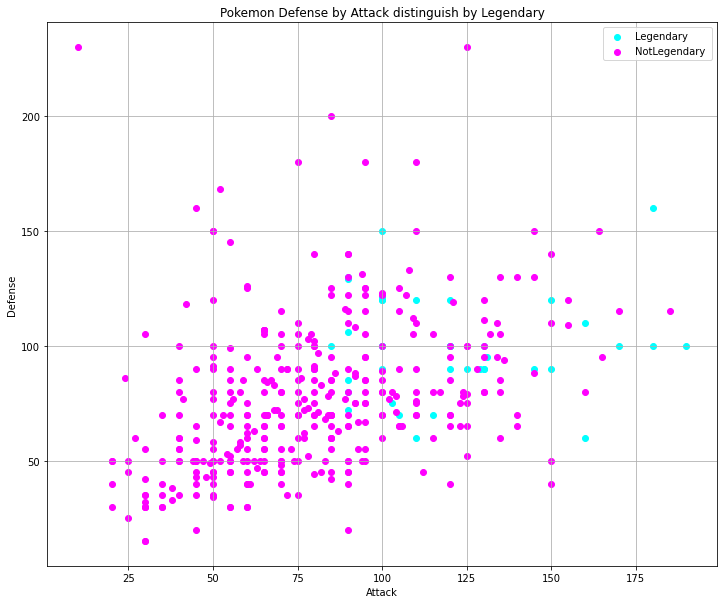

In [13]:
plotlabels = np.sort(df_pokemon_co['Legendary'].unique())
plotdata = [df_pokemon_co[df_pokemon_co['Legendary']==label][['Defense','Attack']] for label in plotlabels]
colors = plt.cm.cool(np.linspace(0, 1, len(plotlabels))) 
plt.figure(figsize=(12, 10)) 
for i, df_pokemon_co in enumerate(plotdata):
    plt.scatter(df_pokemon_co['Attack'],df_pokemon_co['Defense'],color=colors[i],label="{} ".format(plotlabels[i]))
plt.xlabel('Attack') 
plt.ylabel('Defense') 
plt.title('Pokemon Defense by Attack distinguish by Legendary') 
plt.legend() 
plt.grid(zorder=3) 
plt.show()